___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

# Ingest the data to notebook

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There is no null value and all columns are int of float type.

# EDA

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


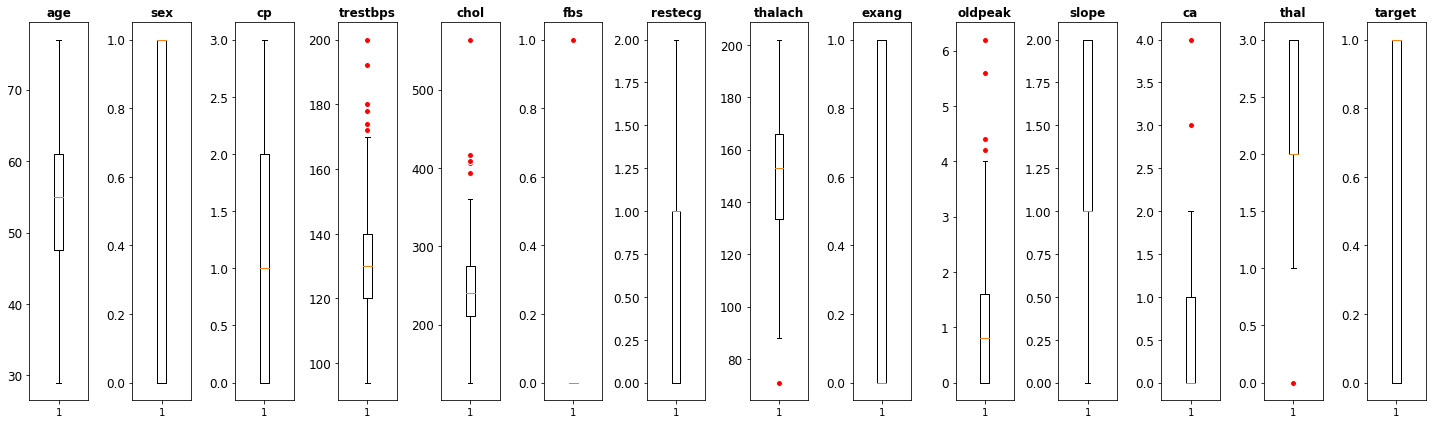

In [6]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,6))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)
    
plt.tight_layout()

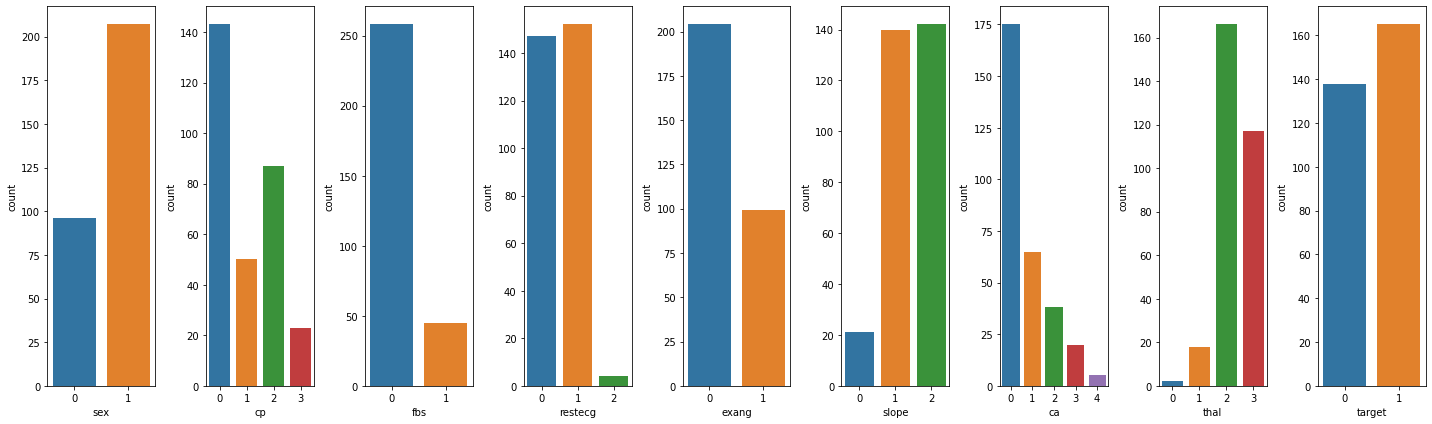

In [7]:
cat_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca","thal","target"]
num_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axs = plt.subplots(1, len(cat_columns), figsize=(20,6))
ax = axs.flatten()
for i in range(len(cat_columns)):
    sns.countplot(df[cat_columns[i]], ax=ax[i])
    
plt.tight_layout()

* Target values is not imbalanced.
* The values ca=4 and thal=0 can be anomaly. They will be controlled. 
* Another dataframe df1 will created to see effect of outliers.

In [8]:
df['cp']=df['cp'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})

df['restecg']=df['restecg'].replace({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})

df['slope']=df['slope'].replace({0:'upsloping',1:'flat',2:'downsloping'})

df['thal']=df['thal'].replace({1:'normal',2:'fixed defect',3:'reversable defect'})

In [9]:
df[df['trestbps']>170].sort_values(by='trestbps')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,non-anginal pain,172,199,1,having ST-T wave abnormality,162,0,0.500,downsloping,0,reversable defect,1
241,59,0,typical angina,174,249,0,having ST-T wave abnormality,143,1,0.000,flat,0,fixed defect,0
101,59,1,asymptomatic,178,270,0,normal,145,0,4.200,upsloping,0,reversable defect,1
260,66,0,typical angina,178,228,1,having ST-T wave abnormality,165,1,1.000,flat,2,reversable defect,0
110,64,0,typical angina,180,325,0,having ST-T wave abnormality,154,1,0.000,downsloping,0,fixed defect,1
203,68,1,non-anginal pain,180,274,1,normal,150,1,1.600,flat,0,reversable defect,0
266,55,0,typical angina,180,327,0,left ventricular hypertrophy,117,1,3.400,flat,0,fixed defect,0
248,54,1,atypical angina,192,283,0,normal,195,0,0.000,downsloping,1,reversable defect,0
223,56,0,typical angina,200,288,1,normal,133,1,4.000,upsloping,2,reversable defect,0


resting blood pressure can be over 200. 

In [10]:
df[df['chol']>370]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,non-anginal pain,140,417,1,normal,157,0,0.800,downsloping,1,fixed defect,1
85,67,0,non-anginal pain,115,564,0,normal,160,0,1.600,flat,0,reversable defect,1
96,62,0,typical angina,140,394,0,normal,157,0,1.200,flat,0,fixed defect,1
220,63,0,typical angina,150,407,0,normal,154,0,4.000,flat,3,reversable defect,0
246,56,0,typical angina,134,409,0,normal,150,1,1.900,flat,2,reversable defect,0


serum cholestoral in mg/dl can be over 400 mg/dl

In [11]:
df[df['thalach'] == 71]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,typical angina,120,237,0,having ST-T wave abnormality,71,0,1.000,flat,0,fixed defect,0


In [12]:
df1 = df[df['thalach'] != 71]

In [13]:
df[df['oldpeak'] > 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,asymptomatic,178,270,0,normal,145,0,4.200,upsloping,0,reversable defect,1
204,62,0,typical angina,160,164,0,normal,145,0,6.200,upsloping,3,reversable defect,0
221,55,1,typical angina,140,217,0,having ST-T wave abnormality,111,1,5.600,upsloping,0,reversable defect,0
250,51,1,typical angina,140,298,0,having ST-T wave abnormality,122,1,4.200,flat,3,reversable defect,0
291,58,1,typical angina,114,318,0,left ventricular hypertrophy,140,0,4.400,upsloping,3,normal,0


In [14]:
df1 = df[df['oldpeak'] < 5]

In [15]:
df[df['ca'] > 3]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,non-anginal pain,138,223,0,having ST-T wave abnormality,169,0,0.000,downsloping,4,fixed defect,1
158,58,1,atypical angina,125,220,0,having ST-T wave abnormality,144,0,0.400,flat,4,reversable defect,1
163,38,1,non-anginal pain,138,175,0,having ST-T wave abnormality,173,0,0.000,downsloping,4,fixed defect,1
164,38,1,non-anginal pain,138,175,0,having ST-T wave abnormality,173,0,0.000,downsloping,4,fixed defect,1
251,43,1,typical angina,132,247,1,normal,143,1,0.100,flat,4,reversable defect,0


In [16]:
df1 = df[df['ca'] < 4]

In [17]:
df[df['thal'] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,non-anginal pain,128,216,0,normal,115,0,0.000,downsloping,0,0,1
281,52,1,typical angina,128,204,1,having ST-T wave abnormality,156,1,1.000,flat,0,0,0


In [18]:
df1 = df[df['thal'] != 0]

In [19]:
df1.shape

(301, 14)

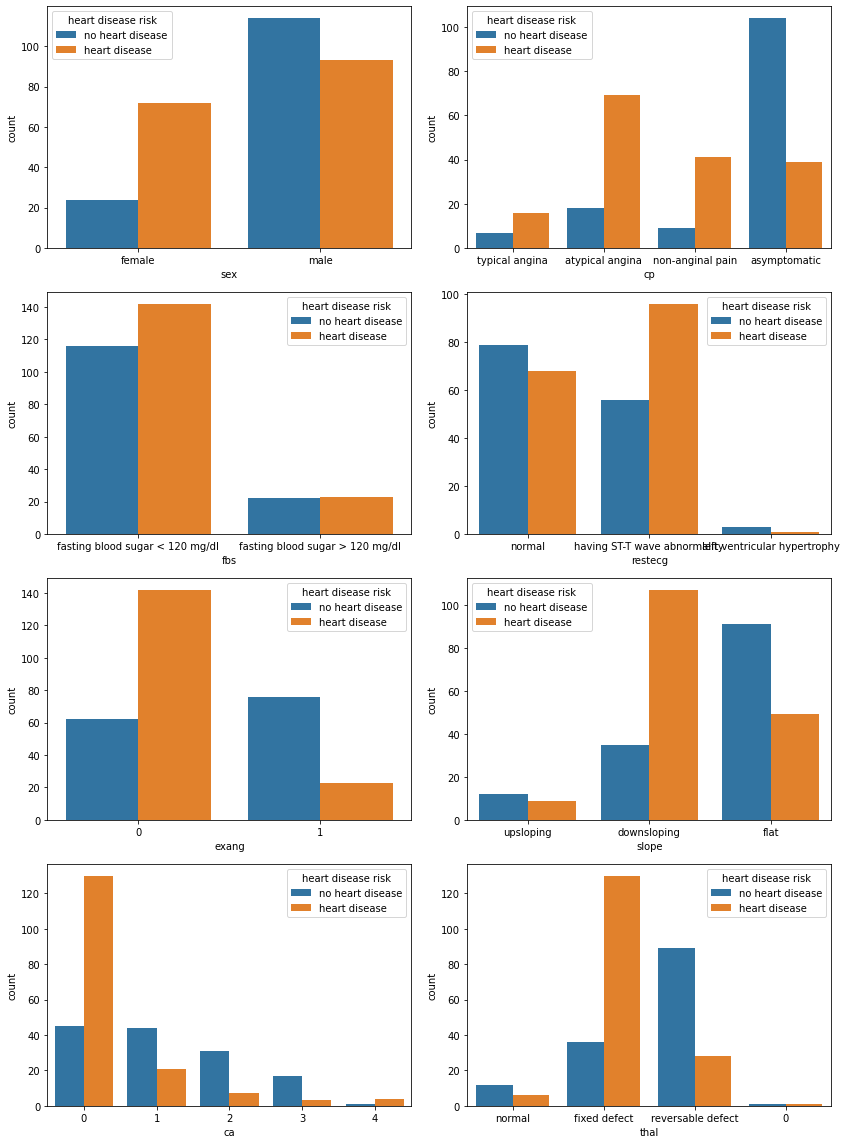

In [20]:
fig, axs = plt.subplots(4, 2, figsize=(12,16))
ax = axs.flatten()
for i in range(8):
    sns.countplot(df[cat_columns[i]], ax=ax[i], hue=df['target'])
    ax[i].legend(title='heart disease risk', labels=['no heart disease', 'heart disease'])


    
ax[0].set_xticklabels(labels=['female','male'])
ax[1].set_xticklabels(labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
ax[2].set_xticklabels(labels=['fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'])
    
    

plt.tight_layout()

* Heart disease rate of females greater than males.
* Heart disease rate of patient whose chest pain type is typical angina is lower than other patients.
* Fasting blood sugar has a little effect on heart disease.

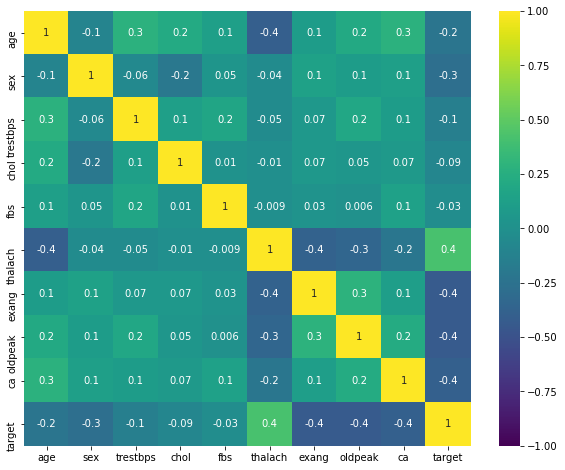

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),vmin = -1, annot=True, cmap='viridis', fmt='.1g')
plt.show()

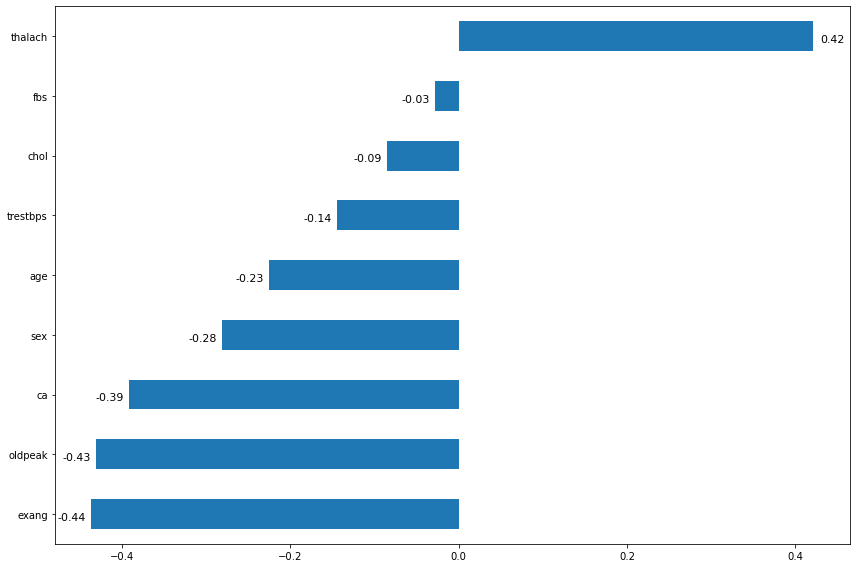

In [22]:
df_corr_target = df.corr()['target'].sort_values(ascending=True).drop('target')
plt.figure(figsize=(12,8))
ax = df_corr_target.plot.barh()
for i in ax.patches:
    if i.get_width()> 0:
        ax.text(i.get_width()+0.008, i.get_y()+0.15, \
            round(i.get_width(), 2), fontsize=11)
    else:
        ax.text(i.get_width()-0.04, i.get_y()+0.15, \
            round(i.get_width(), 2), fontsize=11)
plt.tight_layout()
plt.show()

The most important features are thalach (+), exang (-), oldpeak(-), ca (-).

In [23]:
data = df[num_columns].join(df['target'])

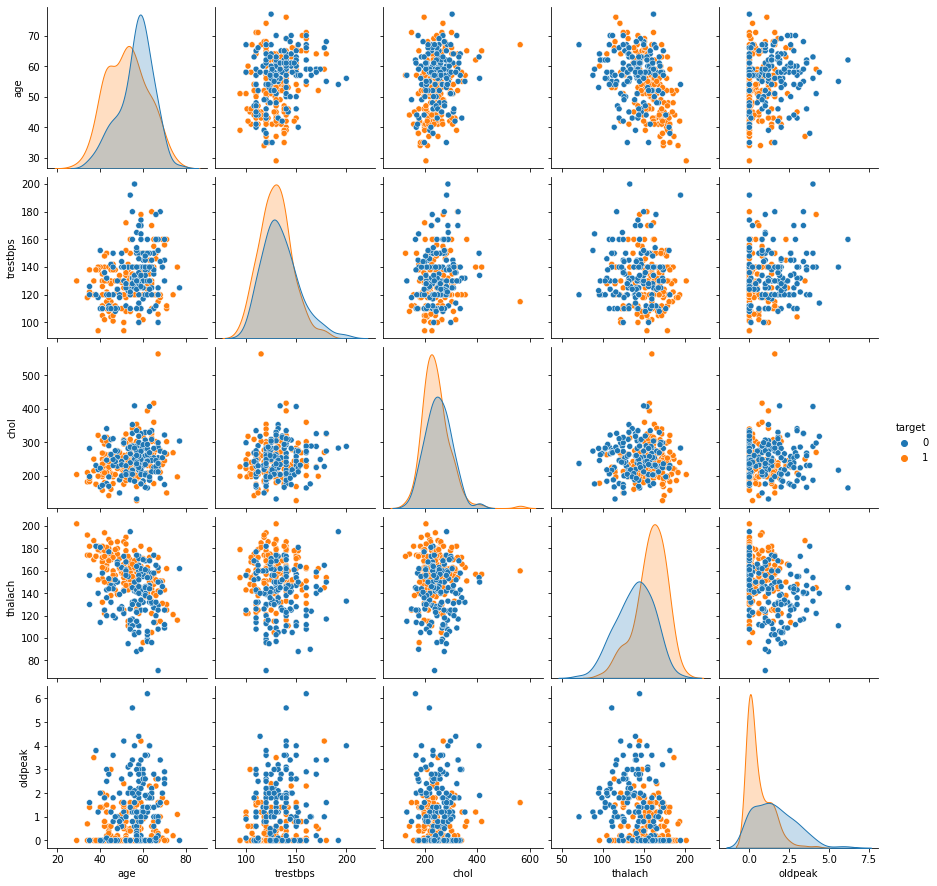

In [24]:
sns.pairplot(data=data, hue='target');

In the scatter plot of features, it is not seem a boundary line that separates the target values.  

In [25]:
df1=pd.get_dummies(df1,drop_first=True)
df1

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145,233,1,150,0,2.300,0,1,0,0,0,0,1,0,1,1,0
1,37,1,130,250,0,187,0,3.500,0,1,0,1,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.400,0,1,1,0,0,0,1,0,0,0,0
3,56,1,120,236,0,178,0,0.800,0,1,1,0,0,0,0,0,0,0,0
4,57,0,120,354,0,163,1,0.600,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.200,0,0,0,0,1,0,0,1,0,0,1
299,45,1,110,264,0,132,0,1.200,0,0,0,0,0,0,0,1,0,0,1
300,68,1,144,193,1,141,0,3.400,2,0,0,0,1,0,0,1,0,0,1
301,57,1,130,131,0,115,1,1.200,1,0,0,0,1,0,0,1,0,0,1


# Data Preprocessing

In [26]:
X=df1.drop(["target"], axis=1)
y=df1["target"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=5)

In [28]:
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [30]:
log_model=LogisticRegression()

In [31]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [32]:
y_pred=log_model.predict(X_test_scaled)

In [33]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [34]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print("--------------------------------------")
    print("Confusion_matrix: ")
    print(confusion_matrix(y_test, y_pred))
    print("classification_report")
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print("--------------------------------------")
    print("Confusion_matrix:")
    print(confusion_matrix(y_train, y_train_pred))
    print("classification_report")
    print(classification_report(y_train, y_train_pred))

In [35]:
def metric_df(model, X_train, y_train, X_test, y_test,name):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    scores = {name: {"accurancy" : accuracy_score(y_test,y_pred),
    "precision" : precision_score(y_test, y_pred),
    "recall" : recall_score(y_test, y_pred),                          
    "f1" : f1_score(y_test,y_pred),
     "True Negative Rate": confusion_matrix(y_test,y_pred)[0][0]/confusion_matrix(y_test,y_pred).sum(),
     "False Positive Rate": confusion_matrix(y_test,y_pred)[0][1]/confusion_matrix(y_test,y_pred).sum(),
    "False Negative Rate": confusion_matrix(y_test,y_pred)[1][0]/confusion_matrix(y_test,y_pred).sum(),
    "True Positive Rate": confusion_matrix(y_test,y_pred)[1][1]/confusion_matrix(y_test,y_pred).sum()}}
    return pd.DataFrame(scores)

In [36]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[24  4]
 [ 5 28]]
classification_report
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Train_Set
--------------------------------------
Confusion_matrix:
[[ 87  22]
 [ 12 119]]
classification_report
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       109
           1       0.84      0.91      0.88       131

    accuracy                           0.86       240
   macro avg       0.86      0.85      0.86       240
weighted avg       0.86      0.86      0.86       240



**Gridsearch**

In [37]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [38]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [39]:
grid_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

In [40]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[24  4]
 [ 2 31]]
classification_report
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.89      0.94      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Train_Set
--------------------------------------
Confusion_matrix:
[[ 82  27]
 [ 11 120]]
classification_report
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       109
           1       0.82      0.92      0.86       131

    accuracy                           0.84       240
   macro avg       0.85      0.83      0.84       240
weighted avg       0.85      0.84      0.84       240



In [41]:
lg = metric_df(grid_model, X_train_scaled, y_train, X_test_scaled, y_test, 'log_reg')
lg

,log_reg
False Negative Rate,0.033
False Positive Rate,0.066
True Negative Rate,0.393
True Positive Rate,0.508
accurancy,0.902
f1,0.912
precision,0.886
recall,0.939


# Implement KNN and Evaluate

In [42]:
test_error_rates = []

for k in range(1,30,2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)

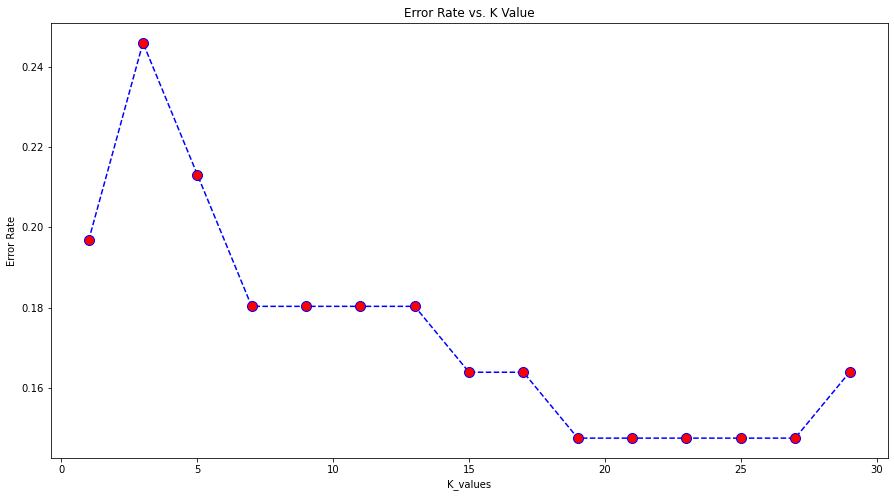

In [43]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30,2), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.show()

**It is seen that best K value is 19.**

In [59]:
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_train_scaled,y_train)
print('WITH K=19\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=19

Test_Set
--------------------------------------
Confusion_matrix: 
[[24  4]
 [ 5 28]]
classification_report
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Train_Set
--------------------------------------
Confusion_matrix:
[[ 85  24]
 [ 13 118]]
classification_report
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       109
           1       0.83      0.90      0.86       131

    accuracy                           0.85       240
   macro avg       0.85      0.84      0.84       240
weighted avg       0.85      0.85      0.84       240



**Cross validate KNN K=19**

In [60]:
knn19 = KNeighborsClassifier(n_neighbors=19)

scores = cross_validate(knn19, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.002,0.013,0.750,0.900,0.643,0.750
2,0.001,0.032,0.917,0.867,1.000,0.929
3,0.001,0.048,0.875,0.917,0.846,0.880
4,0.002,0.017,0.875,0.857,0.923,0.889
5,0.002,0.009,0.792,0.750,0.923,0.828
6,0.001,0.006,0.750,0.684,1.000,0.813
7,0.001,0.006,0.875,0.917,0.846,0.880
8,0.001,0.006,0.750,0.769,0.769,0.769
9,0.001,0.008,0.667,0.647,0.846,0.733
10,0.001,0.007,0.875,0.812,1.000,0.897


In [61]:
df_scores.mean()[2:]

test_accuracy    0.812
test_precision   0.812
test_recall      0.880
test_f1          0.837
dtype: float64

**KNN Grid Search**

In [62]:
knn_grid = KNeighborsClassifier()

In [63]:
k_values= range(1,30,2)

In [64]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [65]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [66]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [67]:
knn_grid_model.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

**Grid search best k=3**

In [68]:
print('WITH K=3\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=3

Test_Set
--------------------------------------
Confusion_matrix: 
[[19  9]
 [ 6 27]]
classification_report
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.75      0.82      0.78        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61


Train_Set
--------------------------------------
Confusion_matrix:
[[ 96  13]
 [ 11 120]]
classification_report
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       109
           1       0.90      0.92      0.91       131

    accuracy                           0.90       240
   macro avg       0.90      0.90      0.90       240
weighted avg       0.90      0.90      0.90       240



In [69]:
knn_df = metric_df(knn, X_train_scaled, y_train, X_test_scaled, y_test, 'knn')
knn_df

,knn
False Negative Rate,0.082
False Positive Rate,0.066
True Negative Rate,0.393
True Positive Rate,0.459
accurancy,0.852
f1,0.862
precision,0.875
recall,0.848


# Visually compare models based on your chosen metric

In [70]:
df_result = pd.concat([lg,knn_df], axis=1)
df_result

,log_reg,knn
False Negative Rate,0.033,0.082
False Positive Rate,0.066,0.066
True Negative Rate,0.393,0.393
True Positive Rate,0.508,0.459
accurancy,0.902,0.852
f1,0.912,0.862
precision,0.886,0.875
recall,0.939,0.848


<AxesSubplot:>

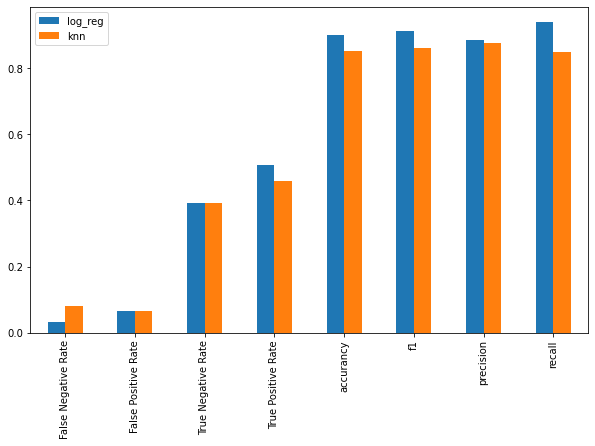

In [71]:
df_result.plot.bar()

Log Regression Confusion Matrix


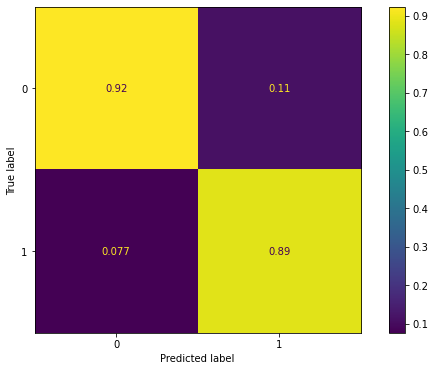

In [72]:
print('Log Regression Confusion Matrix')
plot_confusion_matrix(grid_model, X_test_scaled, y_test, normalize='pred');

KNN Confusion Matrix


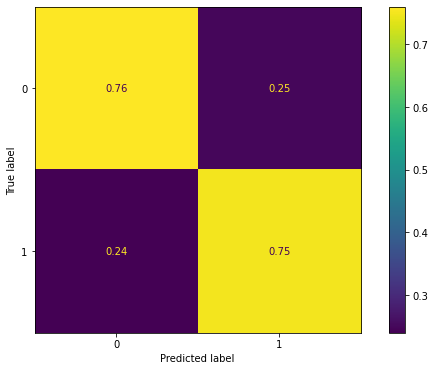

In [73]:
print('KNN Confusion Matrix')
plot_confusion_matrix(knn_grid_model, X_test_scaled, y_test, normalize='pred');

Log Regression ROC Curve


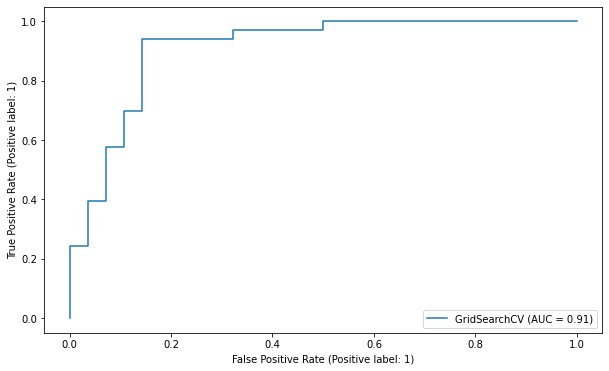

In [74]:
print('Log Regression ROC Curve')
plot_roc_curve(grid_model, X_test_scaled, y_test);

KNN ROC Curve


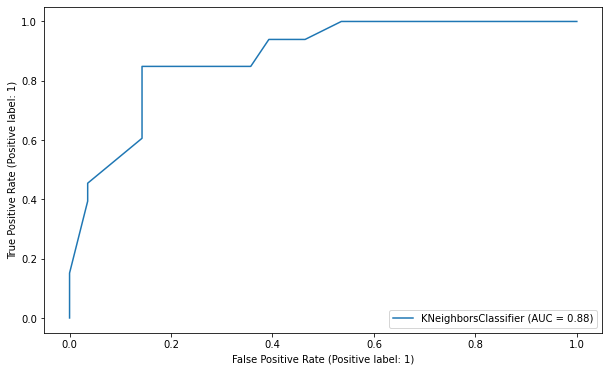

In [76]:
print('KNN ROC Curve')
plot_roc_curve(knn, X_test_scaled, y_test);

# Chose best model and make a random prediction 

### log regression is best model. 

In [77]:
scaler = StandardScaler().fit(X)

In [78]:
import pickle
pickle.dump(scaler, open("scaler_heart_disease", 'wb'))

In [79]:
X_scaled = scaler.transform(X)

In [80]:
final_model = LogisticRegression(C= 0.1, class_weight= None,penalty= 'l1',solver= 'saga').fit(X_scaled, y)

In [81]:
pickle.dump(final_model, open("final_heart_disease", 'wb'))

In [82]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [95]:
my_dict = {"age": [57, 33, 78],
           "sex": [0, 1, 1],
           "trestbps": [140, 160, 180],
           "chol": [200, 250, 300],
           "fbs": [0, 0, 1],
           "thalach": [150, 170, 190],
           "exang": [0,0,1], 
            "oldpeak": [1,2,3], 
             "ca": [1,2,3], 
           "cp_atypical angina":[1,0,0],
           "cp_non-anginal pain":[0,1,0],
           "cp_typical angina":[0,0,1],
           "restecg_left ventricular hypertrophy":[1,0,0],
           "restecg_normal":[0,1,0],
           "slope_flat":[1,0,0],
           "slope_upsloping":[0,0,1],
           "thal_normal":[1,0,0],
           "thal_reversable defect":[0,0,1]
          }

In [96]:
df1

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145,233,1,150,0,2.300,0,1,0,0,0,0,1,0,1,1,0
1,37,1,130,250,0,187,0,3.500,0,1,0,1,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.400,0,1,1,0,0,0,1,0,0,0,0
3,56,1,120,236,0,178,0,0.800,0,1,1,0,0,0,0,0,0,0,0
4,57,0,120,354,0,163,1,0.600,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.200,0,0,0,0,1,0,0,1,0,0,1
299,45,1,110,264,0,132,0,1.200,0,0,0,0,0,0,0,1,0,0,1
300,68,1,144,193,1,141,0,3.400,2,0,0,0,1,0,0,1,0,0,1
301,57,1,130,131,0,115,1,1.200,1,0,0,0,1,0,0,1,0,0,1


In [97]:
sample = pd.DataFrame(my_dict)
sample

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,57,0,140,200,0,150,0,1,1,1,0,0,1,0,1,0,1,0
1,33,1,160,250,0,170,0,2,2,0,1,0,0,1,0,0,0,0
2,78,1,180,300,1,190,1,3,3,0,0,1,0,0,0,1,0,1


In [98]:
scaler_heart_disease = pickle.load(open("scaler_heart_disease", "rb"))

In [99]:
sample_scaled = scaler_heart_disease.transform(sample)
sample_scaled

array([[ 0.28818373, -1.47255596,  0.47550683, -0.89726538, -0.41377074,
         0.01133928, -0.69480833, -0.03718574,  0.25991567,  2.24053565,
        -0.63245553, -0.94503003,  8.61684397, -0.97053361,  1.07956826,
        -0.27386128,  3.96512575, -0.7974143 ],
       [-2.35039581,  0.67909134,  1.61415088,  0.06743272, -0.41377074,
         0.88649889, -0.69480833,  0.82380725,  1.23784838, -0.44632184,
         1.58113883, -0.94503003, -0.11605177,  1.03036102, -0.92629622,
        -0.27386128, -0.25219881, -0.7974143 ],
       [ 2.59694083,  0.67909134,  2.75279493,  1.03213081,  2.41679728,
         1.7616585 ,  1.43924583,  1.68480025,  2.2157811 , -0.44632184,
        -0.63245553,  1.05816743, -0.11605177, -0.97053361, -0.92629622,
         3.65148372, -0.25219881,  1.25405326]])

In [100]:
final_model = pickle.load(open("final_heart_disease", "rb"))

In [101]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [102]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred"] = predictions

In [103]:
sample

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,pred_proba,pred
0,57,0,140,200,0,150,0,1,1,1,0,0,1,0,1,0,1,0,0.800,1
1,33,1,160,250,0,170,0,2,2,0,1,0,0,1,0,0,0,0,0.638,1
2,78,1,180,300,1,190,1,3,3,0,0,1,0,0,0,1,0,1,0.069,0
